In [117]:
# Plotting library
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import gridspec

# Numerical Library
import numpy as np
from numpy import genfromtxt
from numpy.linalg import inv

# Image manipulation library
from PIL import Image

# Limit printout to 3 decimal places
np.set_printoptions(precision=3,suppress=True)

# Allows for printing inline for jupyter notebook
%matplotlib inline 

# http://scikit-learn.org/stable/tutorial/machine_learning_map/

In [118]:
# Load datasets and store in ndarray
raw_train = genfromtxt('usps-4-9-train.csv', delimiter=',')
raw_test = genfromtxt('usps-4-9-test.csv', delimiter=',')

In [119]:
print raw_train[:,256][np.newaxis].T

[[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 1.]
 [ 1.]
 [ 1.]]


In [120]:
# Split off known target values
y_train = raw_train[:,256]
y_test = raw_test[:,256]

# Add dimension to y_train and transpose
y_train = y_train[np.newaxis].T
y_test = y_test[np.newaxis].T

# Remove column 256 from X
raw_train = np.delete(raw_train, 256, axis=1)
raw_test = np.delete(raw_test, 256, axis=1)

## NOT COMPLETELY SURE WE NEED DUMMY ONES

# Function to create array of dummy ones and returned 
# columnar vector
def make_dummy_vector(target):
   temp = np.ones(len(target))
   return temp[np.newaxis].T

# Create dummy 1 values
dummy_train = make_dummy_vector(raw_train)
dummy_test = make_dummy_vector(raw_test)

# Add dummy data to feature matrices
X_train = np.concatenate((dummy_train, raw_train), axis=1)
X_test = np.concatenate((dummy_test, raw_test), axis=1)


# In case we don't need dummy ones
#X_train = raw_train
#X_test = raw_test

In [121]:
# Data for a single sample
print raw_train[0]

[   0.    0.    0.    0.    0.    0.    0.    0.   11.  133.  195.    7.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   12.  120.
  220.  255.  149.    2.    0.    0.    0.    0.    0.    0.    0.   20.
  113.  172.  239.  255.  255.   72.    0.    0.    0.    0.    0.    0.
    0.    0.  122.  255.  253.  174.  105.  155.  255.    3.    0.    0.
    0.    0.    0.    0.    0.   73.  243.  183.   17.    0.    0.  144.
  244.    2.    0.    0.    0.    0.   30.   28.    0.    0.    0.    0.
    0.    0.    0.   98.  201.    0.    0.   15.  102.  179.  255.  174.
    0.    0.    0.    0.    0.    0.    0.  155.  212.   90.  167.  253.
  255.  206.   94.   16.    0.    0.    0.    0.    0.    0.   25.  223.
  255.  239.  139.   64.   43.    0.    0.    0.    0.    0.    0.    0.
   37.  154.  251.  255.  166.   12.    0.    0.    0.    0.    0.    0.
    0.   22.  116.  205.  252.  173.   97.  255.  109.    0.    0.    0.
    0.    0.    0.    0.   90.  248.  198.   93.   

In [122]:
## This is not completely working, we need to figure out why the image seems upside down ##

# Displays a single sample for context
def visualize_sample(data,target):
    temp = np.reshape(data[target],(16,16))
    img = Image.fromarray(temp)
    img.show()
    
# Example call to function
visualize_sample(raw_train, 1200)

In [123]:
# NOT YET NEEDED, INCORRECT FIRST ATTEMPT AT ASSIGNMENT

# Compute optimal weight vector w = (X^T * X)^-1 (X^T * Y)
# def calc_w_vector(X, y):
#     return np.dot(inv(np.dot(X.T,X)), np.dot(X.T,y))

# w_train = calc_w_vector(X_train,y_train)
# w_test = calc_w_vector(X_test,y_test)

# Computer linear regression function
# target_function_train = np.dot(X_test,w_test)
# target_function_test = np.dot(X_test,w_test)

# # Plot the values gathered above
# fig = plt.figure(figsize=(9,6))
# plt.plot(target_function_train)
# fig.suptitle('Linear Regression Function for X_train', fontsize=16)
# plt.xlabel('Sample number', fontsize=16)
# plt.ylabel('Intensity', fontsize=16)

# fig = plt.figure(figsize=(9,6))
# plt.plot(target_function_test)
# fig.suptitle('Linear Regression Function for X_test', fontsize=16)
# plt.xlabel('Sample number', fontsize=16)
# plt.ylabel('Intensity', fontsize=16)

# sigmoid_train = calc_sigmoid(target_function_train)
# sigmoid_test = calc_sigmoid(target_function_test)

# # Plot the values gathered above
# fig = plt.figure(figsize=(9,6))
# plt.plot(sigmoid_train)
# fig.suptitle('Sigmoid Function for X_train', fontsize=16)
# plt.xlabel('Sample number', fontsize=16)
# plt.ylabel('Intensity', fontsize=16)

# fig = plt.figure(figsize=(9,6))
# plt.plot(sigmoid_test)
# fig.suptitle('Sigmoid Function for X_test', fontsize=16)
# plt.xlabel('Sample number', fontsize=16)
# plt.ylabel('Intensity', fontsize=16)

In [124]:
# Calculate sigmoid function
def calc_sigmoid(X, w):
    return 1 / (1 + np.exp(-np.dot(w.T, X)))

In [125]:
print len(np.arange(0,5,0.5))
print np.arange(0.0001, 0.001, 0.0001)

10
[ 0.     0.     0.     0.     0.001  0.001  0.001  0.001  0.001]


In [126]:
## Part 1
w_vectors = []
learning_rates = [
    0.000001, 0.000005, 
    0.00001, 0.00005, 
    0.0001, 0.0005, 
    0.001, 0.005,
    0.01, 0.05,
    0.1, 0.5
] # 10 values between 0 and 5
# def batch_learning(X,y,n,lrn_rate,iterations=1):
#     w_batch = np.zeros(len(X[0]))
#     ## Repeat until convergence  
#     ctr = 0
#     for i in range(iterations):
#         d = np.zeros(len(X[0]))
#         #Range argument limits batch size
#         while(ctr < 1400):
#             for i in range(n):
#                 y_hat_i = calc_sigmoid((np.dot(w_batch.T,X[ctr])))
#                 error = y[i] - y_hat_i
#                 d = np.add(d,error * X[i])
#                 ctr += 1
#             w_batch = np.add(w_batch,lrn_rate * d) 
    
#     return w_batch

def batch_learning(X, y, n, eta, epsilon = 0.001):
    length = len(X[0])
    w, old_d = np.zeros(length), np.zeros(length)
    while True:
        new_d = np.zeros(length)
        for i in range(n):
            expo = np.dot(w.T, X[i])
            y_hat_i = 1 / (1 + np.exp(-expo))
            error = y[i] - y_hat_i
            new_d = np.add(new_d, error * X[i])
        d_norm = np.linalg.norm(old_d - new_d, 2)
        if d_norm < epsilon: break
        w, old_d = np.add(w, eta * new_d), new_d
    return w

for i in learning_rates:
    w_vectors.append(batch_learning(X_train, y_train, 200, i))

D:\Development\Anaconda2\lib\site-packages\ipykernel\__main__.py:35: RuntimeWarning: overflow encountered in exp


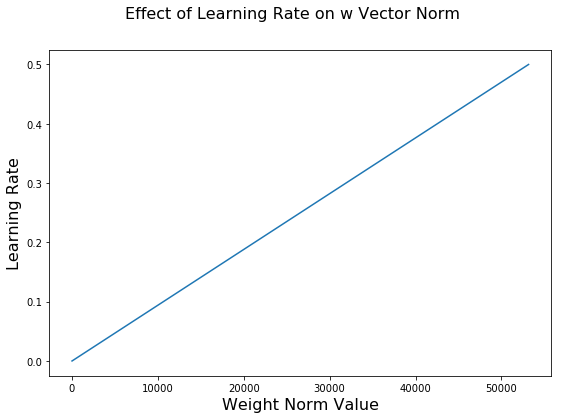

In [127]:
norms = []

for w_vector in w_vectors:
    norms.append(np.linalg.norm(w_vector))

# Plot the values gathered above
fig = plt.figure(figsize=(9,6))
plt.plot(norms, learning_rates)
fig.suptitle('Effect of Learning Rate on w Vector Norm', fontsize=16)
plt.xlabel('Weight Norm Value', fontsize=16)
plt.ylabel('Learning Rate', fontsize=16)

In [128]:
print learning_rates

[1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]


In [129]:
print w_vectors[0]

[-0.    -0.    -0.    -0.001 -0.001 -0.001 -0.003 -0.004 -0.006 -0.005
 -0.002 -0.001 -0.001 -0.    -0.    -0.001 -0.002 -0.    -0.001 -0.002
 -0.004 -0.007 -0.01  -0.013 -0.014 -0.012 -0.007 -0.003 -0.001 -0.001
 -0.002 -0.004 -0.002 -0.    -0.001 -0.004 -0.006 -0.01  -0.013 -0.015
 -0.015 -0.012 -0.007 -0.004 -0.002 -0.003 -0.004 -0.004 -0.002 -0.    -0.003
 -0.005 -0.007 -0.009 -0.011 -0.012 -0.012 -0.011 -0.007 -0.004 -0.004
 -0.004 -0.004 -0.004 -0.002 -0.001 -0.004 -0.006 -0.007 -0.008 -0.008
 -0.008 -0.01  -0.01  -0.008 -0.007 -0.006 -0.005 -0.005 -0.005 -0.003
 -0.001 -0.003 -0.006 -0.007 -0.006 -0.005 -0.006 -0.009 -0.011 -0.01
 -0.008 -0.007 -0.006 -0.006 -0.006 -0.003 -0.001 -0.004 -0.005 -0.004
 -0.003 -0.003 -0.005 -0.009 -0.012 -0.012 -0.009 -0.007 -0.007 -0.006
 -0.005 -0.002 -0.001 -0.003 -0.003 -0.002 -0.002 -0.002 -0.006 -0.01
 -0.014 -0.013 -0.01  -0.008 -0.006 -0.005 -0.004 -0.002 -0.001 -0.002
 -0.002 -0.002 -0.002 -0.004 -0.008 -0.013 -0.014 -0.013 -0.01  -0.007
 

In [130]:
## Part 4

def func_calc_reg(X, y, w, lamda):
    fst = 0
    for i in range(len(w)):
        g = calc_sigmoid((np.dot(w[i].T, X[i])))
        if y[i] == 1: fst += (-np.log10(g))        
        if y[i] == 0: fst += (-np.log10(1 - g))
            
    snd = (lamda * np.linalg.norm(w, 2) ** 2) / 2
    return np.add(fst, snd)

lambdas, norms = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000], []

for w_vector in w_vectors:
    norms.append(np.linalg.norm(w_vector))
    for lamda in lambdas:
        value = func_calc_reg(X_train, y_train, w_vector, lamda)
#         print value

TypeError: calc_sigmoid() takes exactly 2 arguments (1 given)

In [ ]:
norms = []

for i in range(len(w_vectors)):
    norms.append(np.linalg.norm(w_vectors[i]))

# Plot the values gathered above
fig = plt.figure(figsize=(9,6))
plt.plot(learning_rates,norms)
fig.suptitle('Effect of Learning Rate on w Vector Norm', fontsize=16)
plt.xlabel('Learning Rate', fontsize=16)
plt.ylabel('Norm Value', fontsize=16)

In [ ]:
# Experimenting with different learing values

## Thought: Maybe we can use the norm to quantify the effect of the learning rate on our w vector
